In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn import linear_model


In [3]:
iter_csv = pd.read_table('./data/mapAffil_2016_nonull.tsv', sep='\t', encoding='latin-1',
                         dtype={'PMID': object, 
                                'au_order': np.int64, 
                                'year': np.int64,
                                'type': object, 
                                'city': object, 
                                'state':object, 
                                'country': object,
                                'lat': np.float64, 
                                'lon': np.float64, 
                                'fips': object},
                         iterator=True, chunksize=10**6)
mapAffil = pd.concat([chunk[pd.notnull(chunk['fips'])] for chunk in iter_csv])
mapAffil = mapAffil.drop(['Unnamed: 0'], 1)

In [5]:
mort_pubs = pd.read_table('./data/mort_pubs.tsv', sep='\t', encoding='latin-1',
                         dtype={'fips': object})

# drop first column
mort_pubs = mort_pubs.drop(['Unnamed: 0'], 1)

In [6]:
mort_pubs.columns
pubs_cols = mort_pubs.columns[6:]
pubs_cols

Index(['pubs_1988', 'pubs_1989', 'pubs_1990', 'pubs_1991', 'pubs_1992',
       'pubs_1993', 'pubs_1994', 'pubs_1995', 'pubs_1996', 'pubs_1997',
       'pubs_1998', 'pubs_1999', 'pubs_2000', 'pubs_2001', 'pubs_2002',
       'pubs_2003', 'pubs_2004', 'pubs_2005', 'pubs_2006', 'pubs_2007',
       'pubs_2008', 'pubs_2009', 'pubs_2010', 'pubs_2011', 'pubs_2012',
       'pubs_2013', 'pubs_2014', 'pubs_2015', 'pubs_2016', 'pubs_2017'],
      dtype='object')

In [7]:
mort_pubs.head()

,fips,cause,year,rate,delta_pub,delta_rate,pubs_1988,pubs_1989,pubs_1990,pubs_1991,...,pubs_2008,pubs_2009,pubs_2010,pubs_2011,pubs_2012,pubs_2013,pubs_2014,pubs_2015,pubs_2016,pubs_2017
0,01001,all,1999,1064.73351,-0.007337,-10.863475,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,01001,all,2000,1021.78792,-0.007337,-10.863475,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,01001,all,2001,1008.79702,-0.007337,-10.863475,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,01001,all,2002,1037.62083,-0.007337,-10.863475,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,01001,all,2003,1038.44489,-0.007337,-10.863475,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
count_PMID_by_year_fips = mapAffil.groupby(['fips', 'year'])['PMID'].nunique()
count_PMID_by_year_fips = pd.DataFrame(count_PMID_by_year_fips).reset_index()
count_PMID = count_PMID_by_year_fips.loc[(count_PMID_by_year_fips.year > 1988),:]
count_PMID.head()

,fips,year,PMID
0,01001,1992,2
1,01001,2016,1
2,01003,1989,1
3,01003,1990,1
4,01003,1993,1


In [8]:
mort = mort_pubs.loc[:,['fips', 'cause', 'year', 'rate', 'delta_rate']]
mort.head()

,fips,cause,year,rate,delta_rate
0,01001,all,1999,1064.73351,-10.863475
1,01001,all,2000,1021.78792,-10.863475
2,01001,all,2001,1008.79702,-10.863475
3,01001,all,2002,1037.62083,-10.863475
4,01001,all,2003,1038.44489,-10.863475


Memphis


/Users/nataliedeclerck/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/nataliedeclerck/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[[ 0.01138194]]


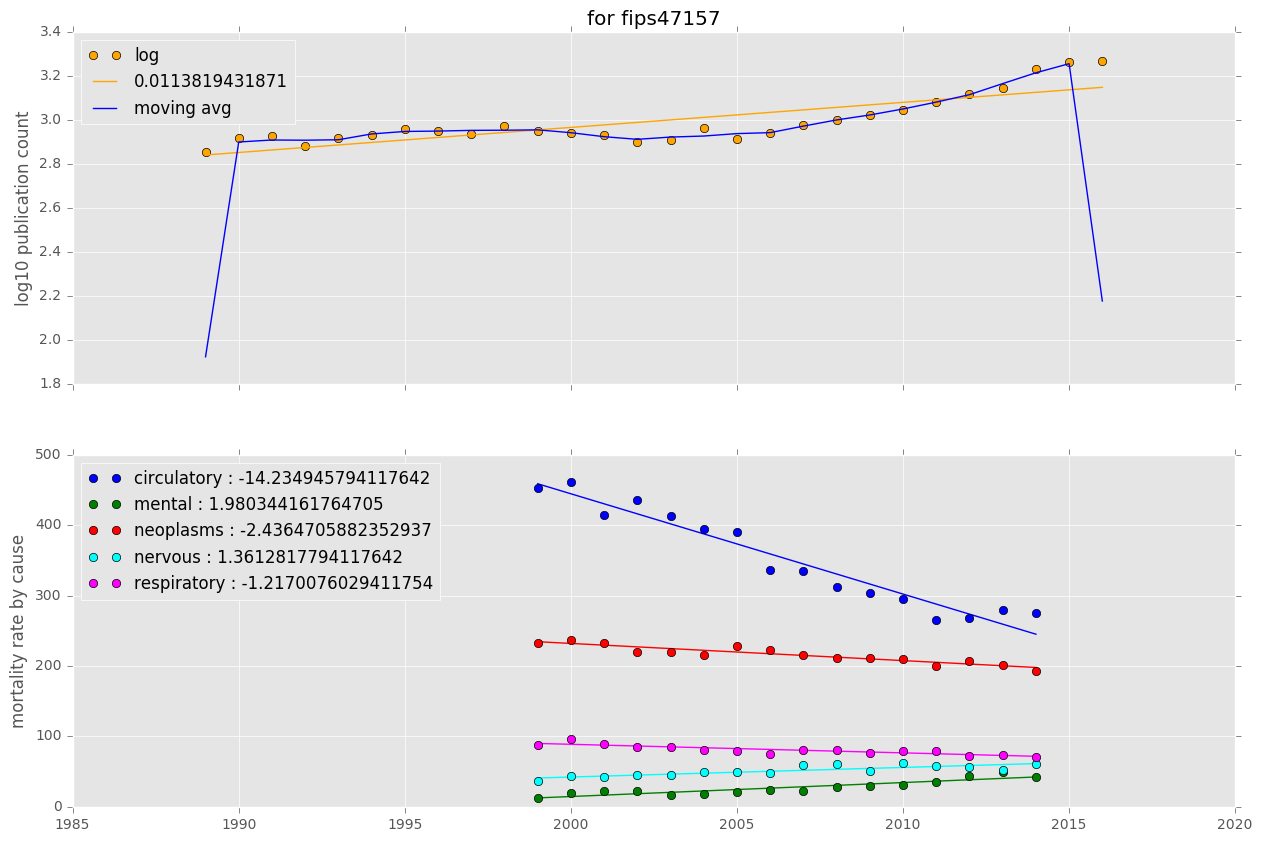

Nashville
[[ 0.02456439]]


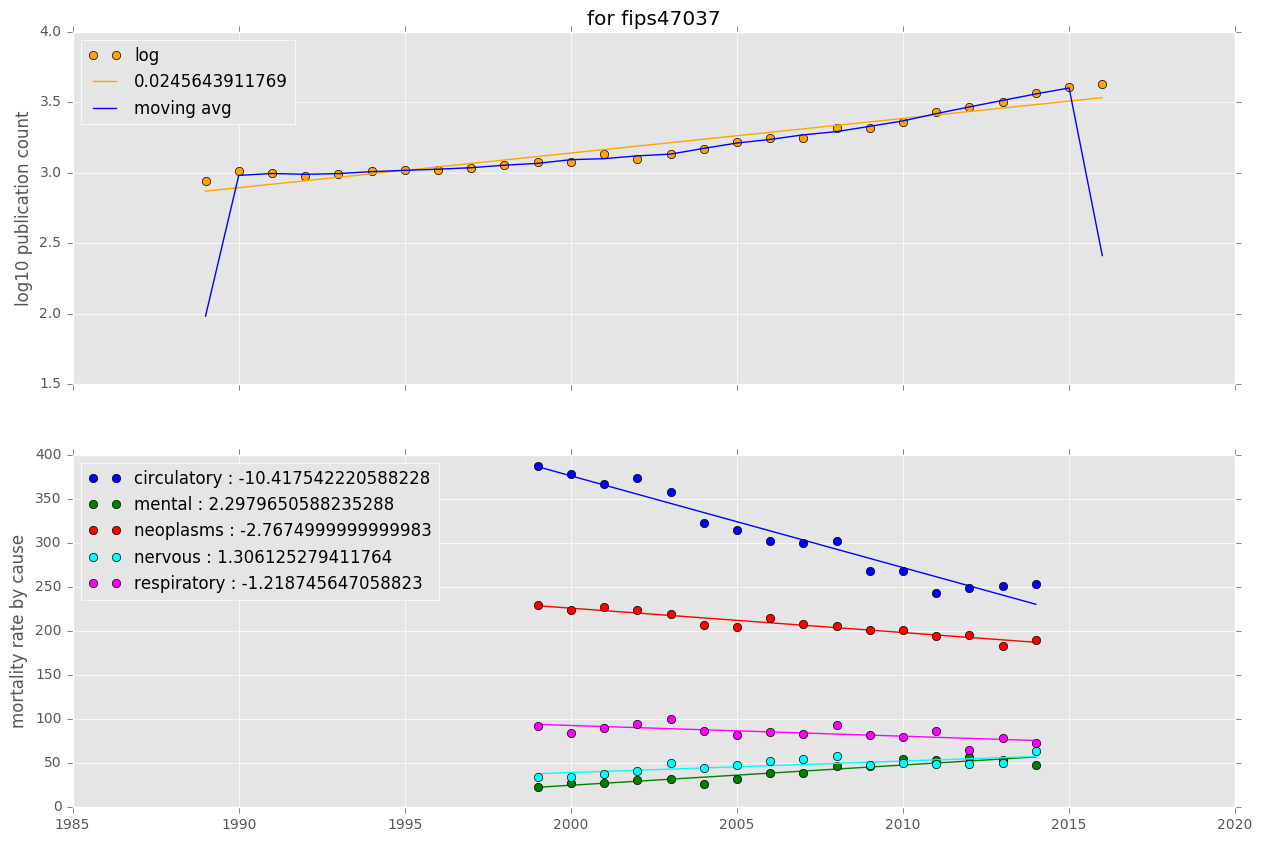

Birmingham
[[ 0.01761536]]


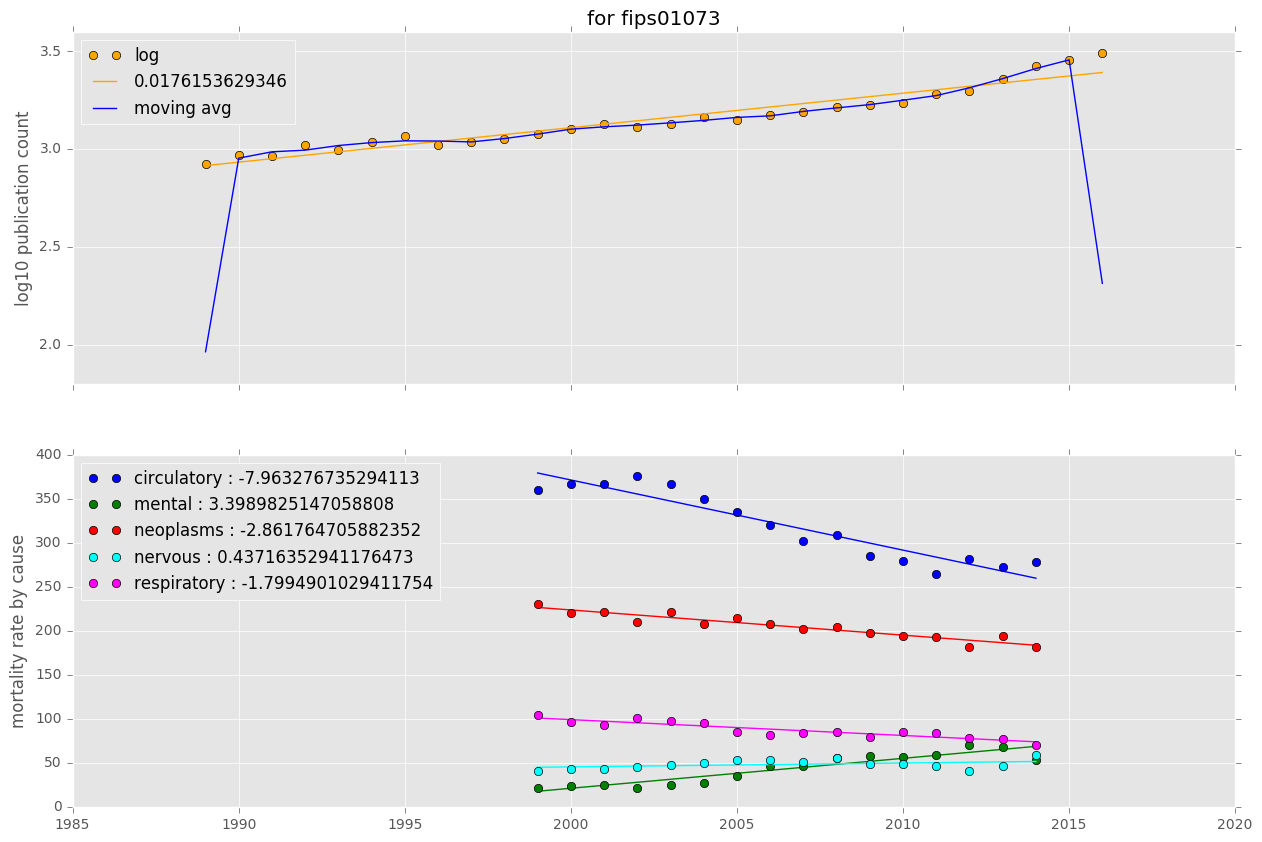

In [17]:
### change this to plot year x pubs for a fips using mort_pubs
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

def plot_year_pubs(fips):
    f, axs = plt.subplots(2,1, sharex=True, figsize=(15,10))
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']
    
    axs[0].set_color_cycle(colors)
    axs[1].set_color_cycle(colors)

    df = count_PMID.loc[(count_PMID.fips == fips) & (count_PMID.year < 2017),:]
    df['log'] = np.log10(df['PMID'] + 1)
    
    causes = ['circulatory', 'mental', 'neoplasms', 'nervous', 'respiratory']
    
    for cause in causes:
        idx = causes.index(cause)
        df2 = mort.loc[(mort.fips == fips) & (mort.cause == cause), ['year', 'rate']]
        
        regr = linear_model.LinearRegression()
        regr.fit(df2.year.to_frame(), df2.rate.to_frame())
        #print(regr.coef_)
        axs[1].plot(df2.year.to_frame(), regr.predict(df2.year.to_frame()), linewidth=1)

        points, = axs[1].plot(df2['year'], df2['rate'], 'o', label=cause+' : {}'.format(regr.coef_[0][0]), color=colors[idx])


    regr = linear_model.LinearRegression()
    regr.fit(df.year.to_frame(), df.log.to_frame())
    print(regr.coef_)
    
    axs[0].plot(df['year'], df['log'], 'o', color='orange')
    axs[0].plot(df.year.to_frame(), regr.predict(df.year.to_frame()), linewidth=1, color='orange', label=regr.coef_[0][0])
    
    
    win = 3
    y_av = movingaverage(df.log, win)
    axs[0].plot(df['year'], y_av, label='moving avg', color='blue')

    axs[0].set_title('for fips'+fips)
    axs[0].set_ylabel('log10 publication count')
    axs[0].legend(loc='best')
    
    axs[1].set_ylabel('mortality rate by cause')
    axs[1].legend(loc='best')
    plt.show()

    
    
    
# print('Boston')
# plot_year_pubs('25025') #Boston
#plot_year_pubs('25017') #Boston
# plot_year_pubs('25021') #Boston
# plot_year_pubs('48037') #Boston
# plot_year_pubs('51083') #Boston

# print('NYC, Manhattan')
# plot_year_pubs('36061')

# print('LA')
# plot_year_pubs('06037')
# #plot_year_pubs('06087') #LA

# print('Chicago')
# plot_year_pubs('17031') #Chicago

# print('Baltimore')
# plot_year_pubs('24510') 

# print('Philadelphia')
# plot_year_pubs('42101') 

# print('Houston')
# plot_year_pubs('48201') 

# print('CU')
# plot_year_pubs('17019') #CU

print("Memphis")
plot_year_pubs('47157')

print('Nashville')
plot_year_pubs('47037')

print('Birmingham')
plot_year_pubs('01073')

#no change   
#plot_year_pubs('51177')

#plot_year_pubs('01001')


# outliers where delta_pubs > 0.08
# plot_year_pubs('21085') # Leitchfield, KY
# plot_year_pubs('26141') # Millersburg, MI
# plot_year_pubs('01071') # Princeton, AL


In [53]:
mapAffil.loc[mapAffil.city.str.contains('Boston'),['fips']].drop_duplicates()

,fips
3,25025
2956,25017
36501,25021
961230,48037
141363,51083


In [60]:
import statsmodels.formula.api as smf

In [173]:
all_causes = mort_pubs.loc[:, ['cause','year', 'rate']]

In [174]:
all_causes.head()

,cause,year,rate
0,all,1999,1064.73351
1,all,2000,1021.78792
2,all,2001,1008.79702
3,all,2002,1037.62083
4,all,2003,1038.44489


In [197]:
y = all_causes.loc[(all_causes.year < 2014) & (all_causes.cause == 'all'), 'rate']
X = all_causes.loc[(all_causes.year < 2014) & (all_causes.cause == 'all'), 'year'].astype('object')
# X2 = all_causes.loc[all_causes.year < 2014, 'cause'].astype('object')
# X1n = all_causes.loc[all_causes.year == 2014, 'year'].astype('object')


data = {"x1" : X, "y" : y}

res = smf.ols("y ~ x1", data=data).fit()
print(res.params)
res.summary()

Intercept     909.847086
x1[T.2000]     -2.644462
x1[T.2001]    -16.186306
x1[T.2002]    -10.951712
x1[T.2003]    -18.770314
x1[T.2004]    -53.148829
x1[T.2005]    -48.267024
x1[T.2006]    -71.860164
x1[T.2007]    -83.531212
x1[T.2008]    -76.813882
x1[T.2009]   -101.835518
x1[T.2010]   -100.838185
x1[T.2011]   -103.865679
x1[T.2012]   -111.146800
x1[T.2013]   -110.348825
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     190.4
Date:                Fri, 21 Apr 2017   Prob (F-statistic):               0.00
Time:                        09:13:24   Log-Likelihood:            -1.9046e+05
No. Observations:               30084   AIC:                         3.810e+05
Df Residuals:                   30069   BIC:                         3.811e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    909.8471      3.035    299.743      0.000       903.898   915.797
x1[T.2000]    -2.6445      4.295     -0.616      0.538       -11.064     5.775
x1[T.2001]   -16.1863      4.293     -3.770      0.000       -24.601    -7.771
x1[T.2002]   -10.9517      4.293     -2.551      0.011       -19.366    -2.538
x1[T.2003]   -18.7703      4.292     -4.373      0.000       -27.183   -10.357
x1[T.2004]   -53.1488      4.293    -12.380      0.000       -61.564   -44.734
x1[T.2005]   -48.2670      4.293    -11.242      0.000       -56.682   -39.852
x1[T.2006]   -71.8602      4.292    -16.742      0.000       -80.273   -63.447
x1[T.2007]   -83.5312      4.294    -19.454      0.000       -91.947   -75.115
x1[T.2008]   -76.8139      4.294    -17.889      0.000       -85.230   -68.398
x1[T.2009]  -101.8355      4.293    -23.720      0.000      -110.251   -93.421
x1[T.2010]  -100.8382      4.292    -23.496      0.000      -109.250   -92.426
x1[T.2011]  -103.8657      4.293    -24.196      0.000      -112.280   -95.452
x1[T.2012]  -111.1468      4.292    -25.895      0.000      -119.560  -102.734
x1[T.2013]  -110.3488      4.292    -25.712      0.000      -118.761  -101.937
==============================================================================
Omnibus:                     2439.381   Durbin-Watson:                   0.427
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5038.190
Skew:                           0.541   Prob(JB):                         0.00
Kurtosis:                       4.687   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [298]:
def rate_by_year(cause):
    y = all_causes.loc[(all_causes.cause == cause), 'rate']
    X = all_causes.loc[(all_causes.cause == cause), 'year'].astype('object')
    
    data = {"year" : X, "rate" : y}

    res = smf.ols("rate ~ year", data=data).fit()
    return res

all_res = rate_by_year('all')
circ_res = rate_by_year('circulatory')
mental_res = rate_by_year('mental')
nervous_res = rate_by_year('nervous')
resp_res = rate_by_year('respiratory')
neo_res = rate_by_year('neoplasms')

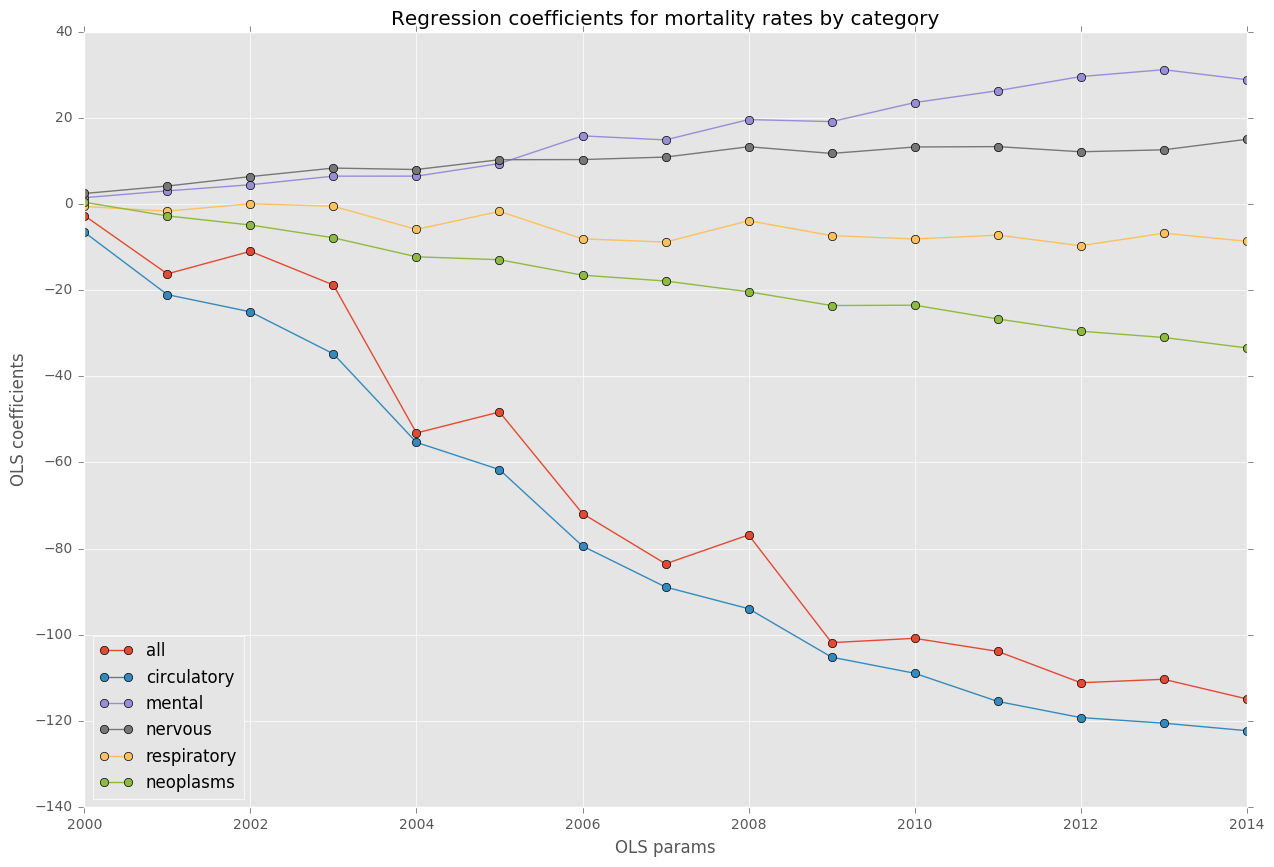

In [307]:
# print(res.params.keys)
# print(res.params.values)

f, ax = plt.subplots(figsize=(15,10))
ax.plot(np.arange(2000,2015), all_res.params.values[1:], 'o-', label="all")
ax.plot(np.arange(2000,2015), circ_res.params.values[1:], 'o-', label="circulatory")
ax.plot(np.arange(2000,2015), mental_res.params.values[1:], 'o-', label="mental")
ax.plot(np.arange(2000,2015), nervous_res.params.values[1:], 'o-', label="nervous")
ax.plot(np.arange(2000,2015), resp_res.params.values[1:], 'o-', label="respiratory")
ax.plot(np.arange(2000,2015), neo_res.params.values[1:], 'o-', label="neoplasms")
ax.legend(loc='best')
ax.set_ylabel('OLS coefficients')
ax.set_xlabel('OLS params')
ax.set_title('Regression coefficients for mortality rates by category')
plt.show()

### model by cause and rate

In [213]:
y = all_causes.loc[all_causes.year < 2014, 'rate']
X = all_causes.loc[all_causes.year < 2014, 'year']
X2 = all_causes.loc[all_causes.year < 2014, 'cause']

X1n = all_causes.loc[all_causes.year == 2014, 'year']
X2n = all_causes.loc[all_causes.year == 2014, 'cause']


data = {"year" : X, "cause" : X2, "rate" : y}

res = smf.ols("rate ~ year + cause", data=data).fit()
print(res.params)
res.summary()

Intercept               9497.702585
cause[T.circulatory]    -555.847221
cause[T.mental]         -806.121273
cause[T.neoplasms]      -653.590457
cause[T.nervous]        -800.593492
cause[T.respiratory]    -760.332813
year                      -4.311337
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rate   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 3.732e+05
Date:                Fri, 21 Apr 2017   Prob (F-statistic):               0.00
Time:                        09:24:42   Log-Likelihood:            -7.9572e+05
No. Observations:              138967   AIC:                         1.591e+06
Df Residuals:                  138960   BIC:                         1.592e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept             9497.7026     92.964    102.165      0.000      9315.495  9679.910
cause[T.circulatory]  -555.8472      0.611   -910.320      0.000      -557.044  -554.650
cause[T.mental]       -806.1213      0.808   -997.670      0.000      -807.705  -804.538
cause[T.neoplasms]    -653.5905      0.616  -1061.652      0.000      -654.797  -652.384
cause[T.nervous]      -800.5935      0.725  -1103.865      0.000      -802.015  -799.172
cause[T.respiratory]  -760.3328      0.644  -1181.120      0.000      -761.595  -759.071
year                    -4.3113      0.046    -93.032      0.000        -4.402    -4.221
==============================================================================
Omnibus:                    35320.678   Durbin-Watson:                   0.469
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           524777.334
Skew:                           0.820   Prob(JB):                         0.00
Kurtosis:                      12.378   Cond. No.                     9.37e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Predict 2014 DR with 2014 years and causes

In [216]:
res.predict(exog=dict(year=X1n, cause=X2n))

array([ 814.66907545,  258.82185439,  161.07861849, ...,  161.07861849,
        814.66907545,  258.82185439])

In [229]:
def df_pred(cause):
    y = all_causes.loc[(all_causes.year < 2014) & (all_causes.cause == cause), 'rate']
    X = all_causes.loc[(all_causes.year < 2014) & (all_causes.cause == cause), 'year']
    
    X1n = all_causes.loc[(all_causes.year == 2014) & (all_causes.cause == cause), 'year']
    
    #df = pd.DataFrame({'rate':y, 'year':X, 'pred_2014': X1n})
    
    data = {"year" : X, "rate" : y}

    res = smf.ols("rate ~ year", data=data).fit()
    
    res.pred = res.predict(exog=dict(year=X1n))
    return res, res.pred

all_df = df_pred('all')
circ_df = df_pred('circulatory')
mental_df = df_pred('mental')
nervous_df = df_pred('nervous')
resp_df = df_pred('respiratory')
neo_df = df_pred('neoplasms')

In [234]:
print(all_df[0].params)
all_df[1]

Intercept    19139.914695
year            -9.118019
dtype: float64


array([ 776.22424975,  776.22424975,  776.22424975, ...,  776.22424975,
        776.22424975,  776.22424975])

In [235]:
mort_pubs.head()

,fips,cause,year,rate,delta_pub,delta_rate,pubs_1988,pubs_1989,pubs_1990,pubs_1991,...,pubs_2008,pubs_2009,pubs_2010,pubs_2011,pubs_2012,pubs_2013,pubs_2014,pubs_2015,pubs_2016,pubs_2017
0,01001,all,1999,1064.73351,-0.007337,-10.863475,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,01001,all,2000,1021.78792,-0.007337,-10.863475,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,01001,all,2001,1008.79702,-0.007337,-10.863475,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,01001,all,2002,1037.62083,-0.007337,-10.863475,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,01001,all,2003,1038.44489,-0.007337,-10.863475,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [240]:
high_mort_pubs = mort_pubs.loc[np.sum(mort_pubs[pubs_cols], axis=1)>10,:]

In [238]:
mort_pubs.shape

(148845, 36)

In [291]:
df = count_PMID.loc[(count_PMID.fips == '25021') & (count_PMID.year < 2017),:]
df.loc[:,'log'] = np.log10(df.loc[:,'PMID'] + 1)
df.head()

/Users/nataliedeclerck/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/nataliedeclerck/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,fips,year,PMID,log
18879,25021,1989,72,1.863323
18880,25021,1990,75,1.880814
18881,25021,1991,73,1.869232
18882,25021,1992,78,1.897627
18883,25021,1993,74,1.875061


In [247]:
df.shape

(28, 4)

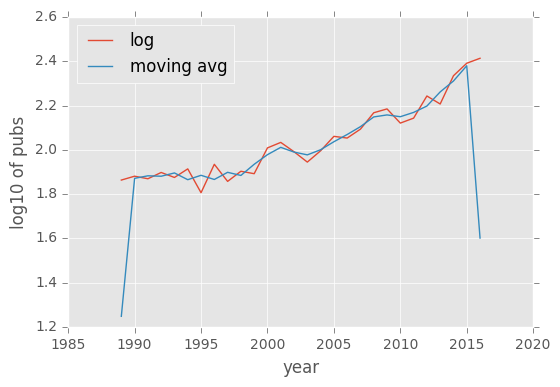

In [288]:
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

win = 3

# print(np.asarray(df.log))
# print(y_av)

plt.plot(df.year,df.log)
# xlim(0,1000)

y_av = movingaverage(df.log, win)
plt.plot(df.year, y_av, label='moving avg')


plt.legend(loc='best')
plt.xlabel("year")
plt.ylabel("log10 of pubs")
plt.show()